<h3> Task 1 </h3>

Randomly construct a $ (3 \times 3 ) $-dimensional probabilistic operator.

That is, randomly determine the entries of the matrix that represents a probabilistic operator.

In [1]:
import numpy as np
from numpy import random

rng = random.default_rng(30)
matrix = rng.integers(0,101,endpoint=True,size=(3,3))
matrix_inv = matrix.T
matrix_normalized =np.zeros_like(matrix_inv,dtype=float)
for i in range(3):
    normalize_factor = np.sum(matrix_inv[i,:])
    matrix_normalized[i,:] = matrix_inv[i,:]/normalize_factor
print(matrix_normalized.T)
    


[[0.08474576 0.19354839 0.69724771]
 [0.36440678 0.32258065 0.08256881]
 [0.55084746 0.48387097 0.22018349]]


<h3> Task 2 </h3>

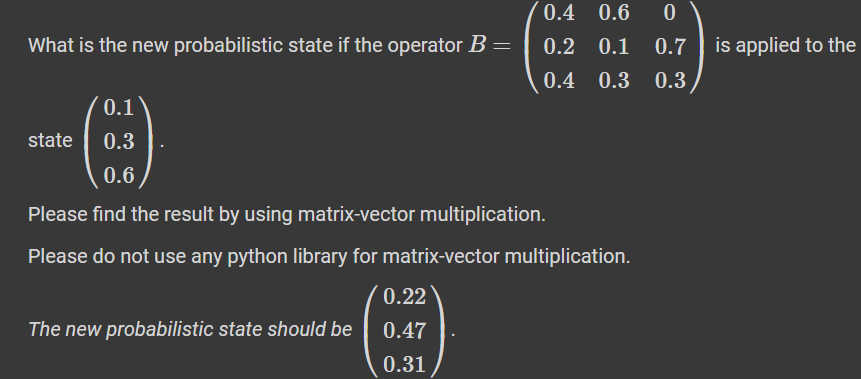

In [2]:
B = np.array([
    [0.4,.6,0],
    [0.2,0.1,0.7],
    [0.4,0.3,0.3]
])

state= np.array([0.1 ,0.3, 0.6])

new_state = B @ state
print(new_state)

[0.22 0.47 0.31]


<h3> Task 3 </h3>

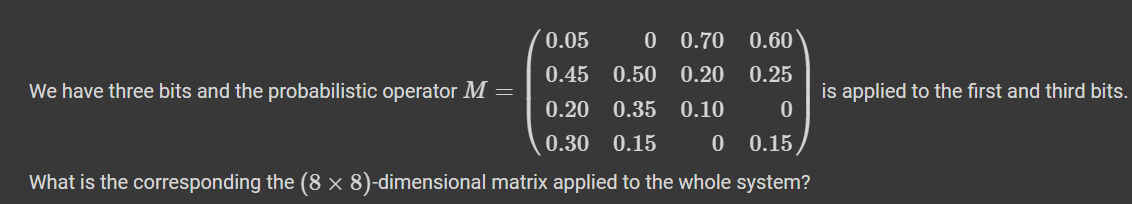

In [3]:
M = [
    [0.05, 0, 0.70, 0.60],
    [0.45, 0.50, 0.20, 0.25],
    [0.20, 0.35, 0.10, 0],
    [0.30, 0.15, 0, 0.15]
]

print("Matrix M is")
for row in M:
    print(row)
print()

K = []
for i in range(8):
    K.append([])
    for j in range(8):
        K[i].append(0)


for col in ['00','01','10','11']:
    for row in ['00','01','10','11']:
        prob = M[int(col,2)][int(row,2)]
        # second bit is 0
        newcol = col[0]+'0'+col[1]
        newrow = row[0]+'0'+row[1]
        K[int(newcol,2)][int(newrow,2)] = prob
        # second bit is 1
        newcol = col[0]+'1'+col[1]
        newrow = row[0]+'1'+row[1]
        K[int(newcol,2)][int(newrow,2)] = prob
print("Matrix K is")
for row in K:
    print(row)

Matrix M is
[0.05, 0, 0.7, 0.6]
[0.45, 0.5, 0.2, 0.25]
[0.2, 0.35, 0.1, 0]
[0.3, 0.15, 0, 0.15]

Matrix K is
[0.05, 0, 0, 0, 0.7, 0.6, 0, 0]
[0.45, 0.5, 0, 0, 0.2, 0.25, 0, 0]
[0, 0, 0.05, 0, 0, 0, 0.7, 0.6]
[0, 0, 0.45, 0.5, 0, 0, 0.2, 0.25]
[0.2, 0.35, 0, 0, 0.1, 0, 0, 0]
[0.3, 0.15, 0, 0, 0, 0.15, 0, 0]
[0, 0, 0.2, 0.35, 0, 0, 0.1, 0]
[0, 0, 0.3, 0.15, 0, 0, 0, 0.15]


<h3> Task 4 </h3>


Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to |0>

Set the value of qubit to |1> by using x-gate.

<b>Experiment 1:</b> Apply one Hadamard gate, make measurement, and execute your program 10000 times.

<b>Experiment 2:</b> Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent these experiments

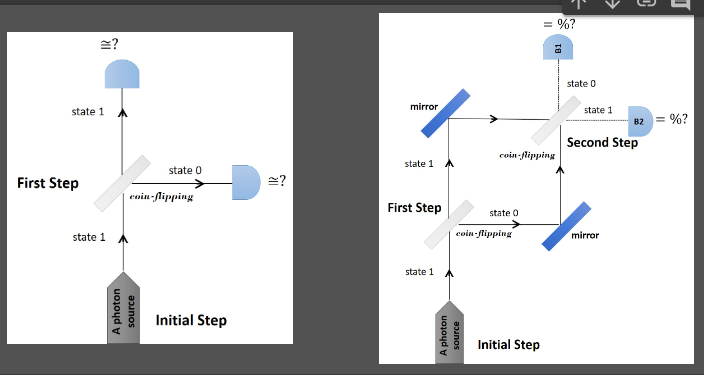

In [5]:
# Installing necessary libraries
!pip install qiskit[visualization]
!pip install qiskit-aer


{'1': 516, '0': 508}


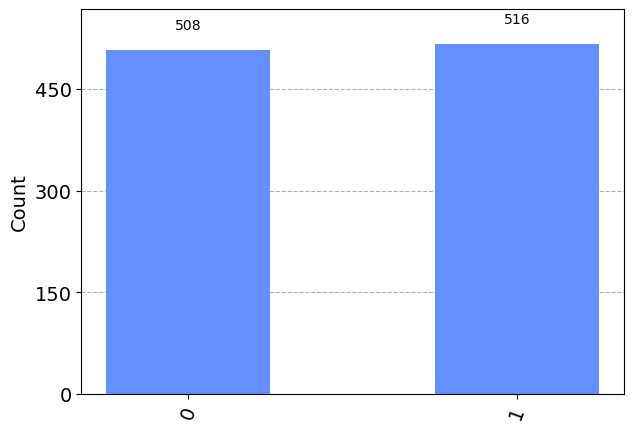

In [8]:
# Experiment 1
from qiskit import QuantumRegister, ClassicalRegister,Aer,execute,QuantumCircuit
from qiskit.visualization import plot_histogram
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)
qc.x(0)
qc.h(0)
qc.measure(q,c)
job1 = execute(qc,Aer.get_backend('qasm_simulator',shots=10000))
count1 = job1.result().get_counts()
print(count1)
plot_histogram(count1)

{'1': 1024}


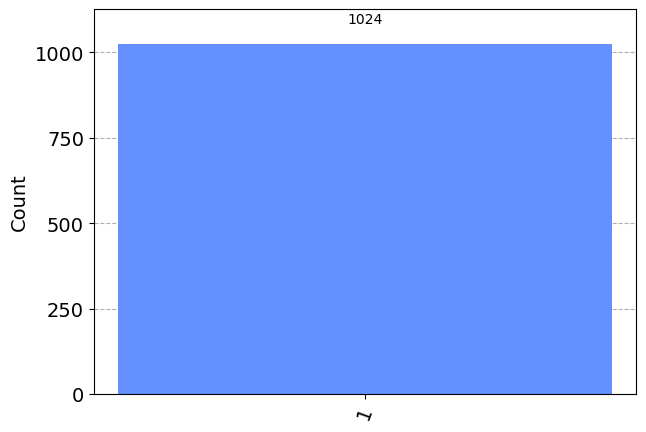

In [9]:
# Experiment-2
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.h(0)
qc.measure(0,0)
job2 = execute(qc,Aer.get_backend('qasm_simulator',shots=10000))
counts2 = job2.result().get_counts(qc)
print(counts2)
plot_histogram(counts2)

<h3> Task 5 </h3>

<b>Write a function</b> that returns a randomly created 2-dimensional quantum state.

<i>Hint:
<ul>
    <li> Pick two random values between -100 and 100 for the amplitudes of state 0 and state 1 </li>
    <li> Find an appropriate normalization factor to divide each amplitude such that the length of quantum state should be 1 </li>
</ul>
</i>

<b>Write a function</b> that determines whether a given vector is a valid quantum state or not.

(Due to precision problem, the summation of squares may not be exactly 1 but very close to 1, e.g., 0.9999999999999998.)

<b>Repeat 10 times:</b>
<ul>
    <li> Randomly pick a quantum state </li>
    <li> Check whether the picked quantum state is valid </li>
    <li> Multiply Hadamard operator with the randomly created quantum state </li>
    <li> Check whether the quantum state in result is valid </li>
</ul>

In [27]:
def random_quantum_state():
    rng = random.default_rng(32)
    quantum_state = rng.integers(-100,100,endpoint=True,size=2)
    length = np.linalg.norm(quantum_state)
    while length==0:
        quantum_state = rng.integers(-100,100,endpoint=True,size=2)
        length = np.linalg.norm(quantum_state)
    quantum_state_normalized = quantum_state / length
    return quantum_state_normalized

In [28]:
def check_validity(quan_state):
    length = np.linalg.norm(quan_state)
    if (1-length)<0.00000001: return True
    else: return False

In [30]:
from math import sqrt
h_gate = np.array([
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
])
for i in range(10):
    picked_quan_state = random_quantum_state()
    print(f'Picked quantum state {picked_quan_state}')
    print(f'Checking validity: {check_validity(picked_quan_state)}')
    h_applied = h_gate @ picked_quan_state
    print(f'New quantum state: {h_applied}')
    print(f'Checking validity: {check_validity(h_applied)}')

Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 -0.66679486]
Checking validity: True
New quantum state: [0.05547002 0.99846035]
Checking validity: True
Picked quantum state [ 0.74524131 

<h3> Task 6 </h3>
Start in state |1>.

Apply a Hadamard gate.

Make a measurement.

If the measurement outcome is 0, stop.

Otherwise, apply a second Hadamard, and then make a measurement.

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


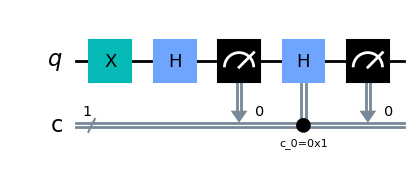

In [31]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.measure(0,0)
qc.h(0).c_if(0,1)
qc.measure(0,0)
qc.draw(output='mpl')

{'1': 262, '0': 738}


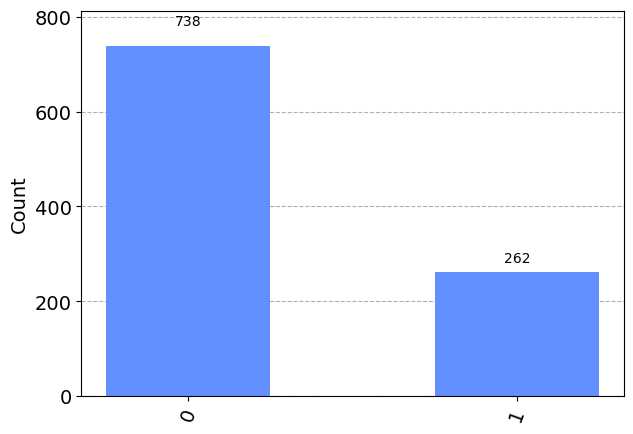

In [33]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts(qc)
print(counts)
plot_histogram(counts)

<h3> Task 7 </h3>
Design the following quantum circuit

start in state |0>

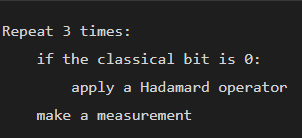

Execute your circuit 1000 times

calculate the expected values of observing '0' and '1' and then compare your result with the simulator result

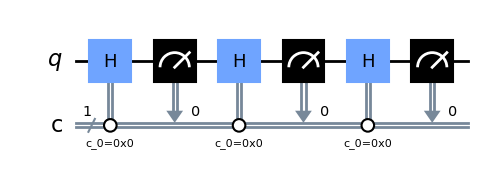

In [35]:
qc = QuantumCircuit(1,1)
for i in range(3):
    qc.h(0).c_if(0,0)
    qc.measure(0,0)
qc.draw(output='mpl')

In [36]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000).result().get_counts()
print(counts)

{'1': 862, '0': 138}


<h3> Task 8 </h3>

Design the following randomly created quantum circuit

Start in state |0>

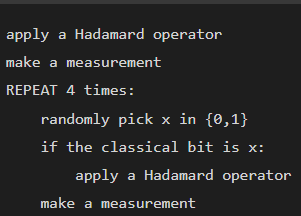

Draw your circuit, and guess the expected frequency of observing '0' and '1' if the circuit is executed 10000 times.

Then, execute your circuit 10000 times , and compare your result with the simulator result

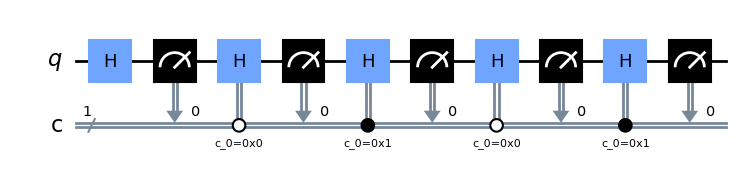

In [38]:
from random import randrange
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
shots = 10000
observe = [shots/2, shots/2]
for i in range(4):
    x = randrange(2)
    if x==0:
        observe[0] /=2
        observe[1] +=observe[0]
    else:
        observe[1] /=2
        observe[0] +=observe[1]
    qc.h(0).c_if(0,x)
    qc.measure(0,0)
qc.draw(output='mpl')
        

In [39]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts(qc)
print(f'Measured: {counts}')
print()
print(f'Calculated: 1->{observe[1]} 0-> {observe[0]}')

Measured: {'0': 6565, '1': 3435}

Calculated: 1->3437.5 0-> 6562.5
